In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

650

In [6]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
  #Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
  #Parse the JSON weather data for the following:
  #City, country, and date
 #Latitude and longitude
 #Maximum temperature
 #Humidity
 #Cloudiness
 #Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(f"Processing Record %s of set %s | %s" % (record_count,set_count,city))
       
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | carballo
Processing Record 2 of set 1 | ilebo
Processing Record 3 of set 1 | longyearbyen
Processing Record 4 of set 1 | mataura
Processing Record 5 of set 1 | kitimat
Processing Record 6 of set 1 | mahebourg
Processing Record 7 of set 1 | rovnoye
Processing Record 8 of set 1 | port macquarie
Processing Record 9 of set 1 | jamestown
Processing Record 10 of set 1 | albany
Processing Record 11 of set 1 | askarovo
Processing Record 12 of set 1 | kingisepp
Processing Record 13 of set 1 | kapaa
Processing Record 14 of set 1 | butaritari
Processing Record 15 of set 1 | hobart
Processing Record 16 of set 1 | kirsanov
Processing Record 17 of set 1 | qui nhon
Processing Record 18 of set 1 | mastic beach
Processing Record 19 of set 1 | tasiilaq
Processing Record 20 of set 1 | oussouye
Processing Record 21 of set 1 | avera
Processing Record 22 of set 1 | port elizabeth
Processing Record 23 of set 1 | valpar

City not found. Skipping...
Processing Record 44 of set 4 | matara
Processing Record 45 of set 4 | marystown
Processing Record 46 of set 4 | zemaiciu naumiestis
Processing Record 47 of set 4 | hirara
Processing Record 48 of set 4 | sheridan
Processing Record 49 of set 4 | saldanha
Processing Record 50 of set 4 | tateyama
Processing Record 1 of set 5 | geresk
City not found. Skipping...
Processing Record 2 of set 5 | kudahuvadhoo
Processing Record 3 of set 5 | blythe
Processing Record 4 of set 5 | coahuayana
Processing Record 5 of set 5 | yulara
Processing Record 6 of set 5 | prieska
Processing Record 7 of set 5 | nanortalik
Processing Record 8 of set 5 | luderitz
Processing Record 9 of set 5 | marienburg
Processing Record 10 of set 5 | diamantino
Processing Record 11 of set 5 | bure
Processing Record 12 of set 5 | bethel
Processing Record 13 of set 5 | malwan
City not found. Skipping...
Processing Record 14 of set 5 | pevek
Processing Record 15 of set 5 | chase
Processing Record 16 of 

Processing Record 31 of set 8 | zhezkazgan
Processing Record 32 of set 8 | na wa
Processing Record 33 of set 8 | moron
Processing Record 34 of set 8 | sandata
Processing Record 35 of set 8 | aksarka
Processing Record 36 of set 8 | nemuro
Processing Record 37 of set 8 | concepcion del uruguay
Processing Record 38 of set 8 | namatanai
Processing Record 39 of set 8 | iqaluit
Processing Record 40 of set 8 | togul
Processing Record 41 of set 8 | fria
Processing Record 42 of set 8 | goderich
Processing Record 43 of set 8 | beroroha
Processing Record 44 of set 8 | pemangkat
Processing Record 45 of set 8 | brae
Processing Record 46 of set 8 | kavieng
Processing Record 47 of set 8 | middelburg
Processing Record 48 of set 8 | souillac
Processing Record 49 of set 8 | pires do rio
Processing Record 50 of set 8 | bilibino
Processing Record 1 of set 9 | ucluelet
Processing Record 2 of set 9 | dobryanka
Processing Record 3 of set 9 | pittsfield
Processing Record 4 of set 9 | vila velha
Processing Rec

Processing Record 23 of set 12 | abu samrah
Processing Record 24 of set 12 | hobyo
Processing Record 25 of set 12 | adamovka
Processing Record 26 of set 12 | puerto baquerizo moreno
Processing Record 27 of set 12 | purranque
Processing Record 28 of set 12 | lolua
City not found. Skipping...
Processing Record 29 of set 12 | shahr-e babak
Processing Record 30 of set 12 | gambo
Processing Record 31 of set 12 | makaha
Processing Record 32 of set 12 | nome
Processing Record 33 of set 12 | riverton
Processing Record 34 of set 12 | san patricio
Processing Record 35 of set 12 | tacarigua
Processing Record 36 of set 12 | san carlos de bariloche
Processing Record 37 of set 12 | rungata
City not found. Skipping...
Processing Record 38 of set 12 | tilichiki
Processing Record 39 of set 12 | kotido
Processing Record 40 of set 12 | kolyvan
Processing Record 41 of set 12 | ostrzeszow
Processing Record 42 of set 12 | kisanga
Processing Record 43 of set 12 | aykhal
Processing Record 44 of set 12 | tripo

In [9]:
len(city_data)

608

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carballo,43.2130,-8.6910,48.99,87,0,1.14,ES,2021-01-15 20:06:21
1,ilebo,-4.3167,20.5833,71.40,82,82,1.41,CD,2021-01-15 20:06:21
2,longyearbyen,78.2186,15.6401,23.00,86,75,2.30,SJ,2021-01-15 20:00:21
3,mataura,-46.1927,168.8643,59.79,81,23,2.28,NZ,2021-01-15 20:04:21
4,kitimat,54.0524,-128.6534,41.00,95,90,8.08,CA,2021-01-15 20:06:21
5,mahebourg,-20.4081,57.7000,78.80,94,75,8.05,MU,2021-01-15 20:04:28
6,rovnoye,50.7765,46.0509,21.45,98,100,5.44,RU,2021-01-15 20:06:22
7,port macquarie,-31.4333,152.9167,62.01,99,0,14.76,AU,2021-01-15 20:04:34
8,jamestown,42.0970,-79.2353,43.00,65,90,20.71,US,2021-01-15 20:04:22
9,albany,42.6001,-73.9662,37.00,73,100,10.27,US,2021-01-15 20:04:20


In [11]:
#reorder columns, new_column_order = ["column2", "column4", "column1"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
#assign new column order to DataFrame:df = df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,carballo,ES,2021-01-15 20:06:21,43.2130,-8.6910,48.99,87,0,1.14
1,ilebo,CD,2021-01-15 20:06:21,-4.3167,20.5833,71.40,82,82,1.41
2,longyearbyen,SJ,2021-01-15 20:00:21,78.2186,15.6401,23.00,86,75,2.30
3,mataura,NZ,2021-01-15 20:04:21,-46.1927,168.8643,59.79,81,23,2.28
4,kitimat,CA,2021-01-15 20:06:21,54.0524,-128.6534,41.00,95,90,8.08
...,...,...,...,...,...,...,...,...,...
603,alofi,NU,2021-01-15 20:04:35,-19.0595,-169.9187,82.40,83,75,8.05
604,yar-sale,RU,2021-01-15 20:04:22,66.8333,70.8333,-5.48,91,100,6.93
605,hambantota,LK,2021-01-15 20:04:42,6.1241,81.1185,75.92,85,100,7.83
606,norman,US,2021-01-15 20:02:32,35.2226,-97.4395,45.00,26,90,32.21


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

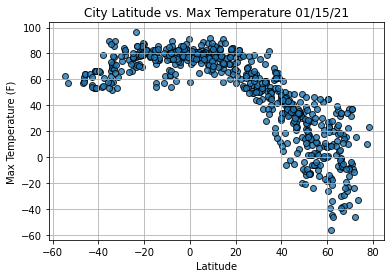

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

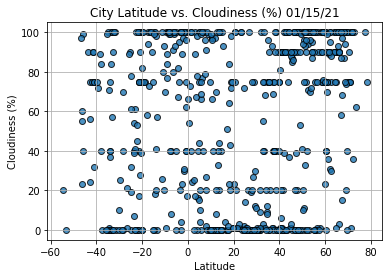

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

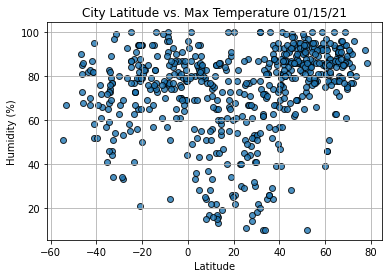

In [17]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

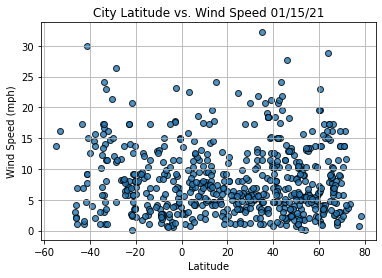

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()